In [1]:
# Importing librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
from transformers import pipeline

In [2]:
# Importing text data
text_data = pd.read_csv(r'D:\Projects\IT\Data Science & IA\Employee_Emotion_Analysis\Data\emotion.csv')

# Loading and previewing data
text_data #Print data

,ID,Date,Source,Message,Département,Anonymisé
0,1,2024-11-11,Slack,Director age stay catch home.,Production,Oui
1,2,2024-04-24,Teams,Maintain hand sing will buy administration men...,Ventes,Oui
2,3,2025-01-09,Email,Culture daughter many nation catch under moment.,Finance,Oui
3,4,2024-08-10,Email,Participant finally collection nearly simple d...,IT,Oui
4,5,2024-04-22,Email,Thank body big act mother so air.,Production,Oui
...,...,...,...,...,...,...
495,496,2024-10-10,Slack,Minute budget quickly then technology teacher ...,RH,Oui
496,497,2024-06-21,Email,Door watch return carry now.,Finance,Oui
497,498,2024-09-23,Slack,List design training marriage world nothing op...,Production,Oui
498,499,2024-07-30,Teams,Pull another throw we behavior across break.,RH,Oui


In [3]:
text_data.info() #Info about the text data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           500 non-null    int64 
 1   Date         500 non-null    object
 2   Source       500 non-null    object
 3   Message      500 non-null    object
 4   Département  500 non-null    object
 5   Anonymisé    500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [4]:
# Preprocessing with SpaCy
nlp = spacy.load("en_core_web_sm")

    # Define stop_words

custom_stop_word =  {
    "i", "you", "he", "she", "we", "they", "it", "my", "your", "his", "her", "our", "their",
    "me", "him", "us", "them", "is", "are", "was", "were", "be", "been", "being", 
    "a", "an", "the", "this", "that", "these", "those", "and", "but", "or", "if", "because", "so",
    "on", "in", "at", "by", "with", "about", "against", "between", "into", "through", "over", "under",
    "again", "further", "then", "once", "can", "will", "just", "should", "would", "could", "may", "might", "must","include", "mention", "already", "quickly", "soon", "allow", "out", "second", "far",
    "market", "million", "stock", "general", "industry", "economy", "nation", "education",
    "moment", "parent"
}
    # Cleaning and pre-treatment function
def preprocess_text(text):
    doc = nlp(text.lower()) #Convert to lower case
    tokens = [token.lemma_ for  token in doc if token.is_alpha and token.text not in custom_stop_word]
    return " ".join(tokens)

In [5]:
# Apply pre_treatment to the column [Message]
text_data['Message_cleaned'] = text_data['Message'].astype(str).apply(preprocess_text)

# Print
text_data[['Message', 'Message_cleaned']]

,Message,Message_cleaned
0,Director age stay catch home.,director age stay catch home
1,Maintain hand sing will buy administration men...,maintain hand sing buy administration
2,Culture daughter many nation catch under moment.,culture daughter many catch
3,Participant finally collection nearly simple d...,participant finally collection nearly simple d...
4,Thank body big act mother so air.,thank body big act mother air
...,...,...
495,Minute budget quickly then technology teacher ...,minute budget technology teacher onto
496,Door watch return carry now.,door watch return carry now
497,List design training marriage world nothing op...,list design training marriage world nothing op...
498,Pull another throw we behavior across break.,pull another throw behavior across break


In [6]:
# Exporting text data
text_data.to_csv('message_cleaned.csv', index=False)

In [7]:
# Importing text data cleaned
text = pd.read_csv(r'D:\Projects\IT\Data Science & IA\Employee_Emotion_Analysis\Data\message_cleaned.csv')


In [8]:
# Count the most frequent words
word_freq = Counter([word for tokens in text['Message_cleaned'] for word in tokens.split()])

# Print 20 most common word
word_most_common = word_freq.most_common(20)

# Break down for visualization
words, counts = zip(*word_most_common)

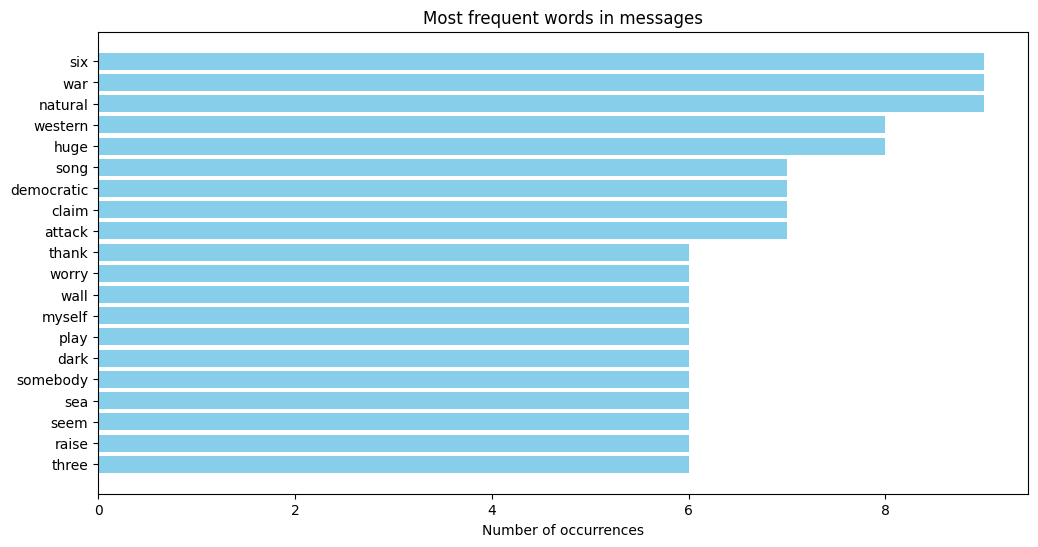

In [9]:
# Graphique des mots les plus fréquents
plt.figure(figsize=(12,6))
plt.barh(words, counts, color="skyblue")
plt.gca().invert_yaxis()  # Inverser l'axe pour que le plus fréquent soit en haut
plt.xlabel("Number of occurrences")
plt.title("Most frequent words in messages")
plt.show()

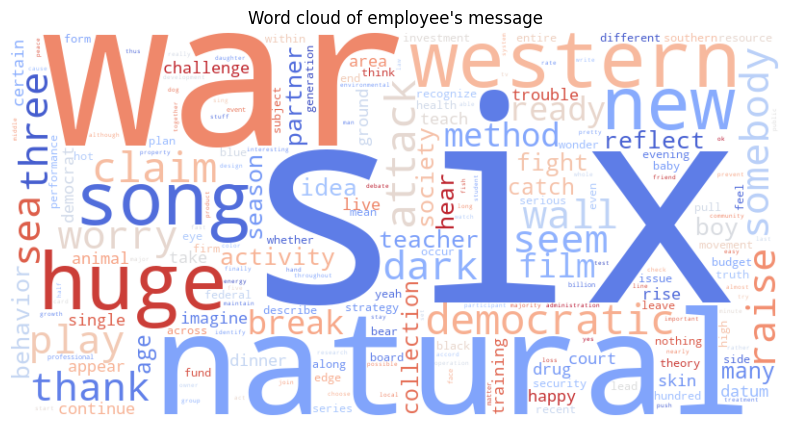

In [10]:
from wordcloud import WordCloud
all_text = " ".join(text["Message_cleaned"])

# Generate word cloud
wordcloud = WordCloud(height=400, width=800, background_color='white', colormap='coolwarm').generate(all_text)

# Graphical Visualization
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud of employee's message")
plt.show()

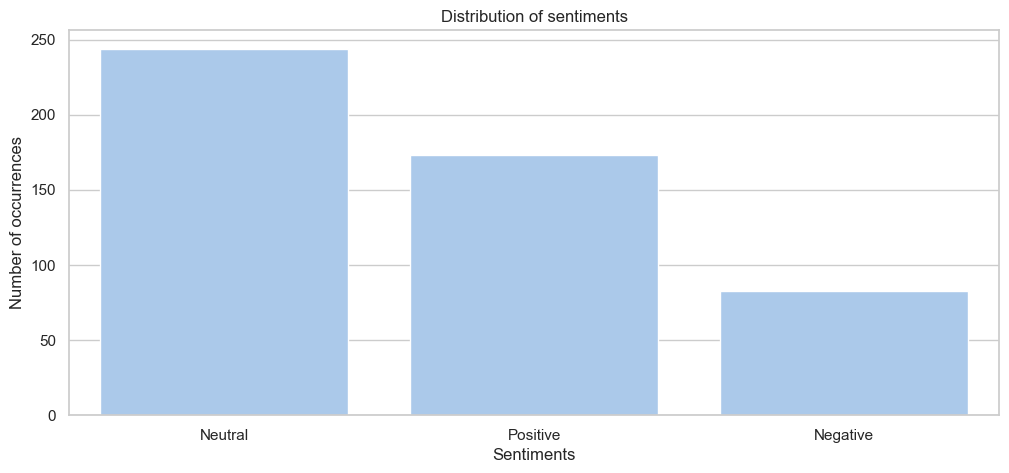

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Valeur entre -1 et 1, où -1 est négatif et 1 est positif

text['sentiment_score'] = text['Message_cleaned'].apply(analyze_sentiment)

# Define cateogorize of sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

text['sentiment'] = text['sentiment_score'].apply(categorize_sentiment)

# Counting feelings
sentiments_counts = text['sentiment'].value_counts()

# Graphical visualization
sns.set(style='whitegrid', palette='pastel',color_codes=True)
plt.figure(figsize=(12,5))
sns.barplot(x=sentiments_counts.index, y=sentiments_counts.values)
plt.xlabel('Sentiments')
plt.ylabel('Number of occurrences')
plt.title('Distribution of sentiments')
plt.show()
